In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json(r'/home/dev105/Pictures/Projects/sample_airbnb.json')

In [3]:
df['amenities'] = [', '.join(item) for item in df['amenities']]

In [4]:
df1 = df[['_id', 'listing_url', 'name', 'summary', 'property_type', 'room_type', 'bed_type',
   'minimum_nights', 'maximum_nights', 'cancellation_policy',
   'last_scraped', 'calendar_last_scraped', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'guests_included', 'weekly_price','amenities',
   'monthly_price', 'reviews_per_month']]

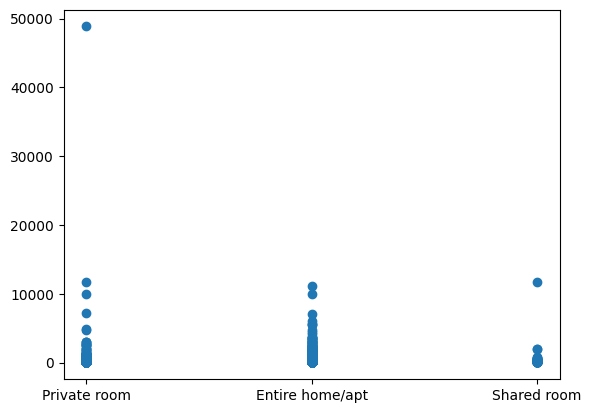

In [7]:
plt.scatter(df1['room_type'], df1['price'])

plt.show()

In [8]:
private_mean_price = df1[df1['room_type'] == 'private room']['price'].mean()
shared_mean_price = df1[df1['room_type'] == 'shared room']['price'].mean()
df1.loc[df1['price'] > 40000, 'price'] = private_mean_price
df1.loc[df1['price'] > 10000, 'price'] = shared_mean_price

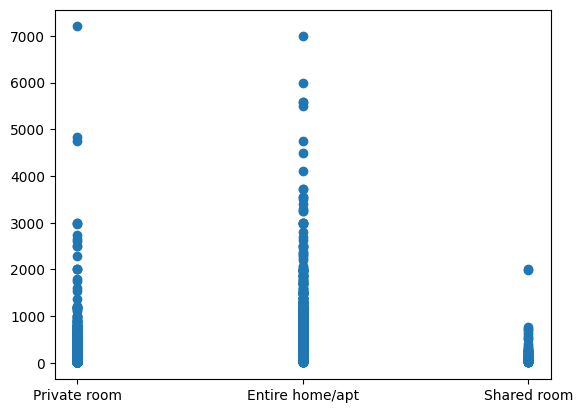

In [9]:
plt.scatter(df1['room_type'], df1['price'])

plt.show()

In [10]:
df1.loc[:, 'bedrooms'] = df1['bedrooms'].fillna(0).astype(int)
df1.loc[:, 'beds'] = df1['beds'].fillna(0).astype(int)
df1.loc[:, 'bathrooms'] = df1['bathrooms'].fillna(0).astype(int)
df1.loc[:, 'security_deposit'] = df1['security_deposit'].fillna(0).astype(int)
df1.loc[:, 'cleaning_fee'] = df1['cleaning_fee'].fillna(0).astype(int)
df1.loc[:, 'weekly_price'] = df1['weekly_price'].fillna(0).astype(int)
df1.loc[:, 'monthly_price'] = df1['monthly_price'].fillna(0).astype(int)
df1.loc[:, 'reviews_per_month'] = df1['reviews_per_month'].fillna(0).astype(int)

In [11]:
host_df = pd.json_normalize(df['host'])
host = df[['_id']].join(host_df)
host.isnull().sum()

_id                             0
host_id                         0
host_url                        0
host_name                       0
host_location                   0
host_about                      0
host_response_time           1388
host_thumbnail_url              0
host_picture_url                0
host_neighbourhood              0
host_response_rate           1388
host_is_superhost               0
host_has_profile_pic            0
host_identity_verified          0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
dtype: int64

In [12]:
host.loc[:, 'host_response_time'] = host['host_response_time'].fillna('Not Specified').astype(str)
host.loc[:, 'host_response_rate'] = host['host_response_rate'].fillna(0).astype(int)
host.drop(columns=['host_thumbnail_url', 'host_picture_url','host_verifications'], inplace=True)
host_values = host.to_dict(orient='records')

In [13]:
address_df = pd.json_normalize(df['address'])
address = df[['_id']].join(address_df)
address_values = address.to_dict(orient='records')

In [14]:
availability_df = pd.json_normalize(df['availability'])
availability = df[['_id']].join(availability_df)
availability_values = availability.to_dict(orient='records')

In [15]:
review_scores_df = pd.json_normalize(df['review_scores'])
review_scores = df[['_id']].join(review_scores_df)

In [16]:
review_scores.loc[:, 'review_scores_accuracy'] = review_scores['review_scores_accuracy'].fillna(0).astype(int)
review_scores.loc[:, 'review_scores_cleanliness'] = review_scores['review_scores_cleanliness'].fillna(0).astype(int)
review_scores.loc[:, 'review_scores_checkin'] = review_scores['review_scores_checkin'].fillna(0).astype(int)
review_scores.loc[:, 'review_scores_communication'] = review_scores['review_scores_communication'].fillna(0).astype(int)
review_scores.loc[:, 'review_scores_location'] = review_scores['review_scores_location'].fillna(0).astype(int)
review_scores.loc[:, 'review_scores_value'] = review_scores['review_scores_value'].fillna(0).astype(int)
review_scores.loc[:, 'review_scores_rating'] = review_scores['review_scores_rating'].fillna(0).astype(int)
review_scores_values = review_scores.to_dict(orient='records')

In [17]:
merged_values = df1.merge(host, on='_id').merge(address, on='_id').merge(availability, on='_id').merge(review_scores, on='_id')

In [18]:
merged_values.rename(columns={'location.type': 'location_type', 'location.coordinates':'location_coordinates','location.is_location_exact':'location_is_location_exact'}, inplace=True)
merged_values[['longitude', 'latitude']] = merged_values['location_coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))

merged_values = merged_values.drop(columns=['location_coordinates'])

merged_values.columns

Index(['_id', 'listing_url', 'name', 'summary', 'property_type', 'room_type',
       'bed_type', 'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'accommodates', 'bedrooms',
       'beds', 'number_of_reviews', 'bathrooms', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'guests_included', 'weekly_price',
       'amenities', 'monthly_price', 'reviews_per_month', 'host_id',
       'host_url', 'host_name', 'host_location', 'host_about',
       'host_response_time', 'host_neighbourhood', 'host_response_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'host_listings_count', 'host_total_listings_count', 'street', 'suburb',
       'government_area', 'market', 'country', 'country_code', 'location_type',
       'location_is_location_exact', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'review_scores_accuracy',
       'review_scores_clean

In [19]:
merged_values['location_is_location_exact'].value_counts()

location_is_location_exact
True     3735
False    1820
Name: count, dtype: int64

In [20]:
merged_values.isnull().sum()

_id                            0
listing_url                    0
name                           0
summary                        0
property_type                  0
room_type                      0
bed_type                       0
minimum_nights                 0
maximum_nights                 0
cancellation_policy            0
last_scraped                   0
calendar_last_scraped          0
accommodates                   0
bedrooms                       0
beds                           0
number_of_reviews              0
bathrooms                      0
price                          6
security_deposit               0
cleaning_fee                   0
extra_people                   0
guests_included                0
weekly_price                   0
amenities                      0
monthly_price                  0
reviews_per_month              0
host_id                        0
host_url                       0
host_name                      0
host_location                  0
host_about

In [21]:
import psycopg2
conn = psycopg2.connect(host="localhost", user="postgres", password="postgres", database="airbnb", port="5432")
cursor = conn.cursor()

In [22]:
cursor.execute("""
CREATE TABLE airbnb (_id SERIAL PRIMARY KEY, listing_url TEXT,name TEXT,summary TEXT,property_type TEXT,
room_type TEXT,bed_type TEXT,minimum_nights INTEGER,maximum_nights INTEGER,cancellation_policy TEXT,
last_scraped DATE,calendar_last_scraped DATE,accommodates INTEGER,bedrooms INTEGER,
beds INTEGER,number_of_reviews INTEGER,bathrooms REAL,price NUMERIC,
security_deposit NUMERIC,cleaning_fee NUMERIC,extra_people NUMERIC,guests_included INTEGER,
weekly_price NUMERIC,monthly_price NUMERIC,reviews_per_month REAL,host_id TEXT,amenities TEXT,
host_url TEXT,host_name TEXT,host_location TEXT,host_about TEXT,host_response_time TEXT,
host_neighbourhood TEXT,host_response_rate INTEGER,host_is_superhost BOOLEAN,host_has_profile_pic BOOLEAN,
host_identity_verified BOOLEAN,host_listings_count INTEGER,host_total_listings_count INTEGER,
street TEXT,suburb TEXT,government_area TEXT,market TEXT,country TEXT,country_code TEXT,location_type TEXT,latitude NUMERIC,longitude NUMERIC,
location_is_location_exact BOOLEAN,availability_30 INTEGER,availability_60 INTEGER,availability_90 INTEGER,availability_365 INTEGER,
review_scores_accuracy INTEGER,review_scores_cleanliness INTEGER,review_scores_checkin INTEGER,review_scores_communication INTEGER,
review_scores_location INTEGER,review_scores_value INTEGER,review_scores_rating INTEGER);
""")

conn.commit()
cursor.close()
conn.close()

In [27]:
from sqlalchemy import create_engine

db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'
db_name = 'airbnb'


engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
merged_values.to_sql('airbnb', engine, if_exists='replace', index=False)


105